In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_util
import plotly.express as px
import networkx as nx
import pickle
import os
from tqdm import tqdm
sns.set_theme()
from scipy.stats import pearsonr
import datetime

In [3]:
# df_10 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/df_final.csv')
# df_10['date'] = pd.to_datetime(df_10['Unnamed: 0'])
# df_10 = df_10.set_index('date')
# df_10.sort_index(inplace=True)
# df_10 = df_10.drop(columns=['Unnamed: 0'])

df_10_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_10/df_final.csv')
df_10_windowed['date'] = pd.to_datetime(df_10_windowed['Unnamed: 0'])
df_10_windowed = df_10_windowed.set_index('date')
df_10_windowed.sort_index(inplace=True)
df_10_windowed = df_10_windowed.drop(columns=['Unnamed: 0'])


df_26_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_26/df_final.csv')
df_26_windowed['date'] = pd.to_datetime(df_26_windowed['Unnamed: 0'])
df_26_windowed = df_26_windowed.set_index('date')
df_26_windowed.sort_index(inplace=True)
df_26_windowed = df_26_windowed.drop(columns=['Unnamed: 0'])

# df_2_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_2/df_final.csv')
# df_2_windowed['date'] = pd.to_datetime(df_2_windowed['Unnamed: 0'])
# df_2_windowed = df_2_windowed.set_index('date')
# df_2_windowed.sort_index(inplace=True)
# df_2_windowed = df_2_windowed.drop(columns=['Unnamed: 0'])

In [4]:
def make_plots(df,title):
    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    fig.suptitle(title, fontsize=20)

    sns.lineplot(data=df['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
    sns.scatterplot(data=df['N_nodes'],ax=ax[0])
    sns.lineplot(data=df['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
    sns.scatterplot(data=df['N_edges'],ax=ax[0])
    ax[0].set_title('N Nodes/Edges', fontsize=17)
    # ax[0].set_xticklabels(df.index.year, rotation=45, ha='right', fontsize=12)
    ax[0].set_xlabel('Date', fontsize=14)
    ax[0].set_ylabel('Number', fontsize=14)
    ax[0].set_yscale('log')
    ax[0].legend(fontsize=14)

    sns.lineplot(data=df['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
    sns.scatterplot(data=df['clustering_coefficient'],ax=ax[1])
    ax[1].set_title('Clustering Coefficient', fontsize=15)
    # ax[1].set_xticks(df.index.year, rotation=45, ha='right', fontsize=12)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

    sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df,ax=ax[2])
    sns.regplot(x='N_nodes',y='clustering_coefficient',data=df,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
    ax[2].set_title('Clustering Coefficient', fontsize=15)
    ax[2].set_xscale('log')
    ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
    ax[2].set_ylabel('N Nodes', fontsize=14)
    plt.tight_layout()
    plt.show()

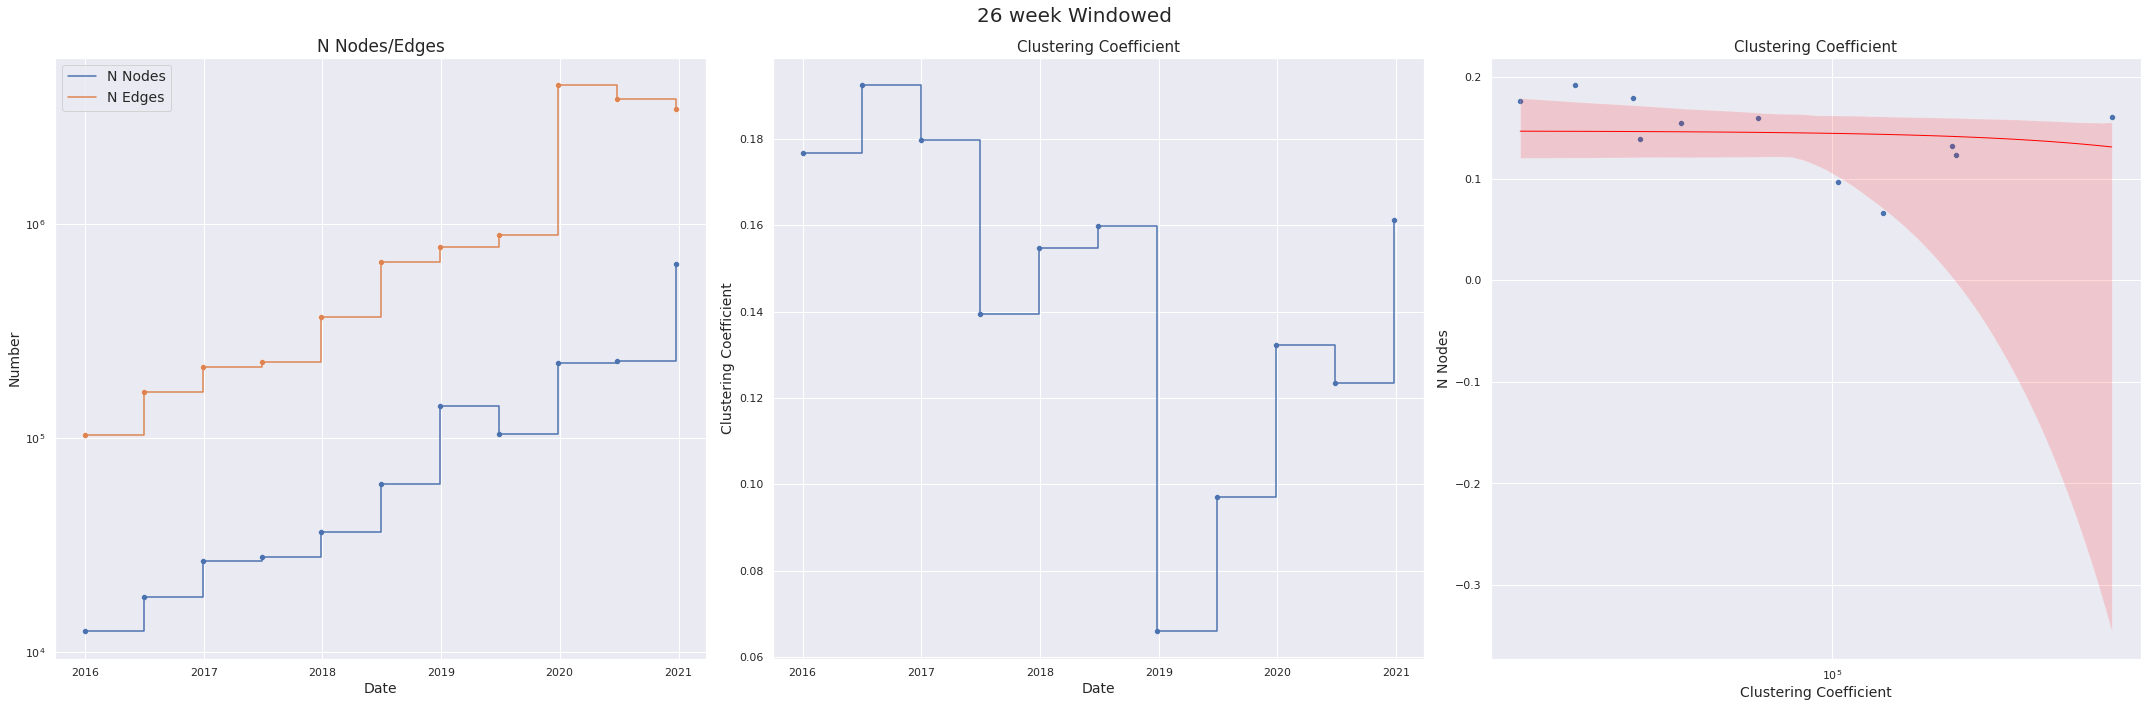

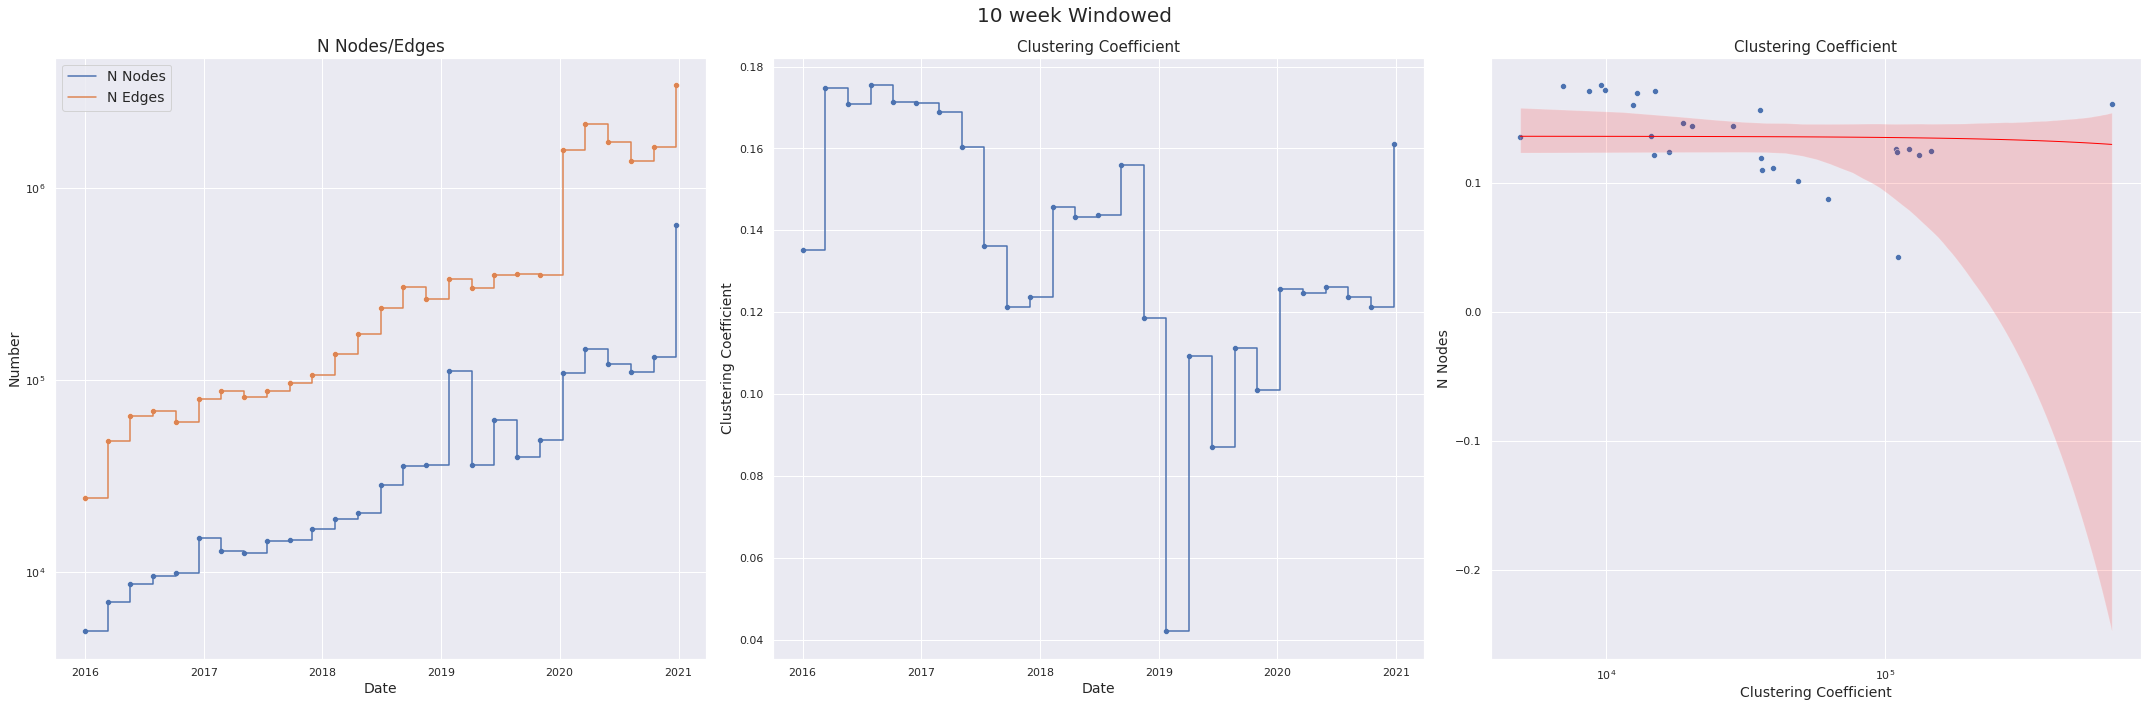

In [5]:
make_plots(df_26_windowed,'26 week Windowed')
make_plots(df_10_windowed,'10 week Windowed')
# make_plots(df_2_windowed,'2 week Windowed (small)')

In [6]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['clustering_coefficient'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['clustering_coefficient'])

# sns.lineplot(data=df_10_windowed['clustering_coefficient'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['clustering_coefficient'])

# # sns.lineplot(data=df_10['clustering_coefficient'],label='10 weeks')
# # sns.scatterplot(data=df_10['clustering_coefficient'])

# plt.show()

In [7]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['N_nodes'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['N_nodes'])

# sns.lineplot(data=df_10_windowed['N_nodes'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['N_nodes'])

# # sns.lineplot(data=df_10['N_nodes'],label='10 weeks')
# # sns.scatterplot(data=df_10['N_nodes'])

# # log scale
# plt.yscale('log')


# plt.show()

In [6]:
p='/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10_v2'

files = os.listdir(p)

def get_before_date(file_name):
    return datetime.datetime.strptime(file_name[16:-4], '%Y-%m-%d')

files_date_dict = {}

for file in files:
    date = get_before_date(file)
    if date in files_date_dict:
        "Error: date already in dict"
    else:
        files_date_dict[date] = [file]

files_date_dict = {k: v for k, v in sorted(files_date_dict.items(), key=lambda item: item[0])}

mc = []
md = []
ms = []
mean_mean_score = []
mean_clustering_coefficient = []

for file in tqdm(files_date_dict.values()):
    df_scores=pd.read_csv(p+'/'+file[0])
    df_scores.degree = df_scores.degree.apply(lambda x: int(x) if x.isdigit() else 0)
    rho = df_scores.corr()
    mc.append(rho['mean_score']['clustering_coefficient'])
    md.append(rho['mean_score']['degree'])
    ms.append(rho['mean_score']['sum_score'])

    mean_mean_score.append(df_scores.mean_score.mean())
    mean_clustering_coefficient.append(df_scores.clustering_coefficient.mean())
    # deviation_scores.append(df_scores.sum_score.std())
    # max_scores.append(df_scores.sum_score.max())

100%|██████████| 23/23 [00:06<00:00,  3.65it/s]


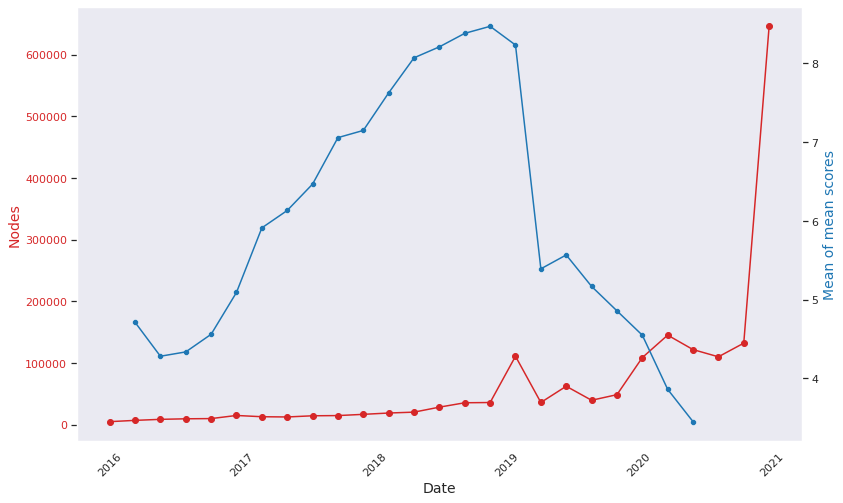

In [7]:
## seaborn theme no grid
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.scatter(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean of mean scores', color=color, fontsize=14)  # we already handled the x-label with ax1
sns.scatterplot(x=list(files_date_dict.keys()),y=mean_mean_score, color=color, ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=mean_mean_score, color=color, ax=ax2)

plt.show()

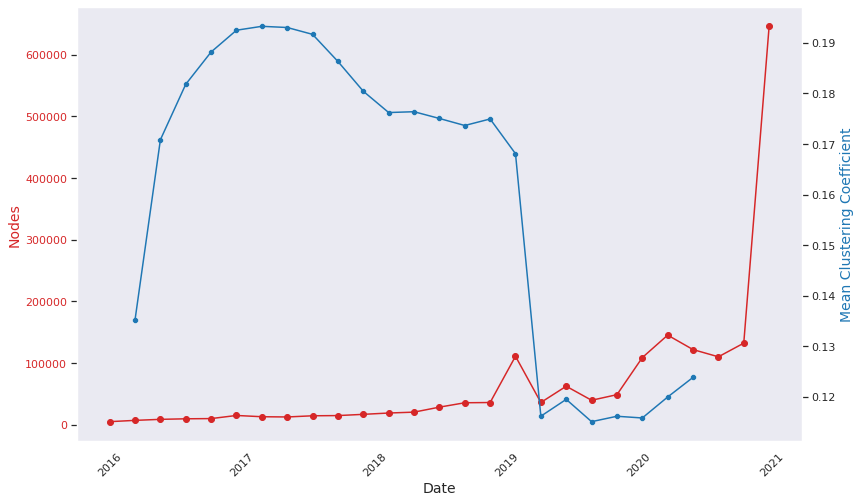

In [8]:
## seaborn theme no grid
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.scatter(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean Clustering Coefficient', color=color, fontsize=14)  # we already handled the x-label with ax1
sns.scatterplot(x=list(files_date_dict.keys()),y=mean_clustering_coefficient, color=color, ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=mean_clustering_coefficient, color=color, ax=ax2)

plt.show()

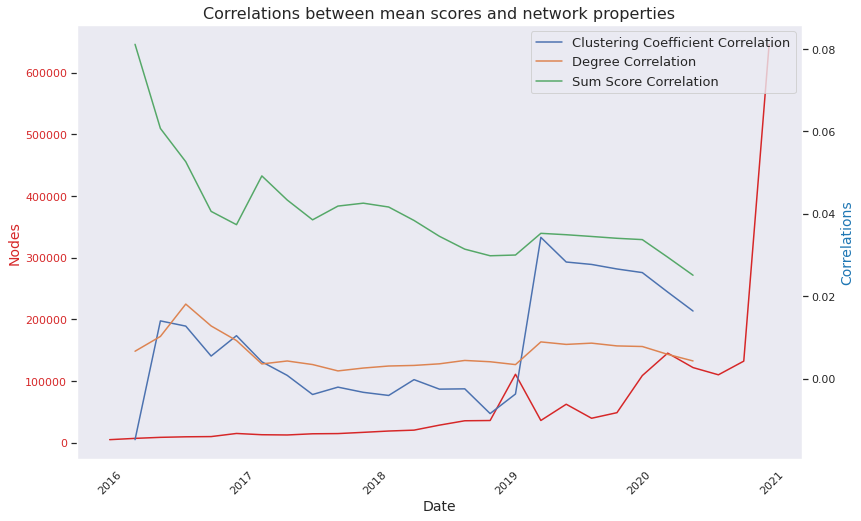

In [9]:
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color, label='Nodes')


ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Correlations', color=color, fontsize=14)  # we already handled the x-label with ax1

sns.lineplot(x=list(files_date_dict.keys()),y=mc,label='Clustering Coefficient Correlation',ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=md,label='Degree Correlation',ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=ms,label='Sum Score Correlation',ax=ax2)
plt.legend(fontsize=13, loc='upper right')
plt.title('Correlations between mean scores and network properties', fontsize=16)
plt.show()

# Top authors

In [15]:
df_all=pd.DataFrame()

for file, date in zip(tqdm(files_date_dict.values()),list(files_date_dict.keys())):
    df=pd.read_csv(p+'/'+file[0])
    df.degree = df.degree.apply(lambda x: int(x) if x.isdigit() else 0)

    df['date'] = date
    df_all = pd.concat([df_all,df])

df_all=df_all.loc[df_all.author != '[deleted]']
df_all=df_all.loc[df_all.author != 'AutoModerator']
df_all.set_index('date', inplace=True)

100%|██████████| 23/23 [00:06<00:00,  3.48it/s]


In [61]:
# df_all.loc[df_all.author == 'DeepFuckingValue']

In [114]:
# top10=df_all.groupby('author').activity.sum().sort_values(ascending=False).head(5).index
# top10=df_all.loc[df_all.author.isin(top10)]


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='degree', label=author, legend=False)

# plt.show()

# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='clustering_coefficient', label=author, legend=False)

# plt.show()


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='mean_score', label=author, legend=False)

# plt.show()


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='sum_score', label=author, legend=False)

# plt.show()

In [113]:
# top10=df_all.groupby('author').mean_score.mean().sort_values(ascending=False).head(10).index
# top10=df_all.loc[df_all.author.isin(top10)]


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='degree', label=author, legend=False)

# plt.show()

# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='clustering_coefficient', label=author, legend=False)

# plt.show()


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='mean_score', label=author, legend=False)

# plt.show()


# plt.figure(figsize=(13,8))
# for author in top10.author.unique():
#     sns.lineplot(data=top10.loc[top10.author==author], x='date', y='sum_score', label=author, legend=False)

# plt.show()

In [20]:
df_all.loc[df_all.author == 'DeepFuckingValue']

,author,sum_score,mean_score,activity,degree,clustering_coefficient
date,,,,,,
2019-11-01,DeepFuckingValue,194.0,3.079365,63,51,0.202353
2020-01-10,DeepFuckingValue,316.0,2.000000,158,127,0.125677
2020-03-20,DeepFuckingValue,386.0,1.738739,222,205,0.112862
2020-05-29,DeepFuckingValue,337.0,1.375510,245,251,0.095867


# March 2019

In [79]:
N_nodes_dict = {}
end_date =  []
Gs = []
for f in os.listdir('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_2'):
    G=nx.read_gpickle('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_2/'+f)
    N_nodes_dict[f[6:16]] = G.number_of_nodes()
    end_date.append(f[17:27])
    Gs.append(G)

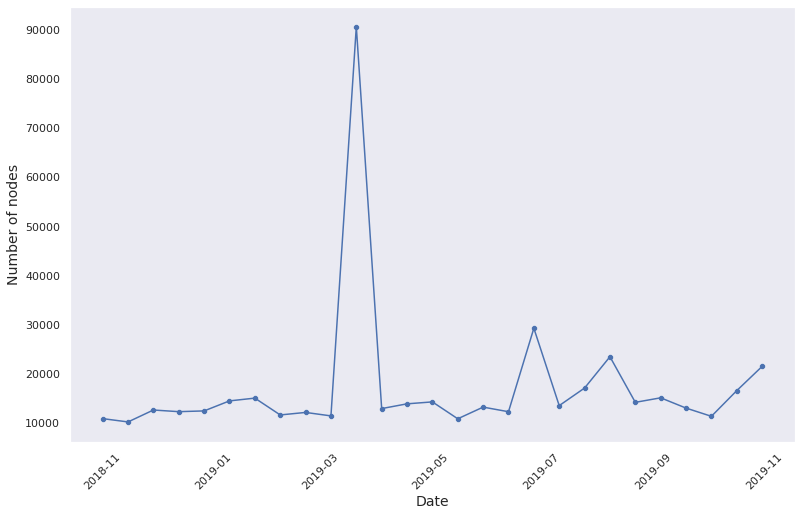

In [80]:
df_N = pd.DataFrame(N_nodes_dict.items(), columns=['date', 'N'])
df_N['end_date'] = end_date
df_N['G']=Gs
df_N.date = pd.to_datetime(df_N.date)

# plot
plt.figure(figsize=(13,8))
sns.lineplot(data=df_N, x='date', y='N')
sns.scatterplot(data=df_N, x='date', y='N')

# more x ticks dates
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of nodes', fontsize=14)
plt.show()

In [81]:
# get row with max N
df_N.loc[df_N.N == df_N.N.max()]

,date,N,end_date,G
4,2019-03-21,90602,2019-04-04,"(PumpkinSpiceBukkake, JzNex, live4rice, AutoMo..."


In [88]:
G1=df_N.iloc[3].G
G2=df_N.iloc[4].G


# get all nodes g1 not in g2
nodes_g2_not_g1 = [n for n in G2.nodes() if n not in G1.nodes()]

In [95]:
print([n for n in nodes_g2_not_g1 if 'bot' in n])

['Biobot775', 'EncouragementRobot', 'mobott', 'hornyboto', 'autoarguebot', 'Canbot', 'bimbolimbotimbo', 'LobotomyJesus', 'gifv-bot', 'flufferbot01', 'Gravebot', 'toplessrobot', 'OGInkbot', 'meme_botanist', 'shazbotter', 'Goodbot9000', 'not_a_robot20', 'botrickbateman', 'SEC-Scanbot-v5', 'Flambotron', 'botmot', 'hellothere-bot', 'redditbot7777', 'yanbotgabe', 'toyrobotboy', 'delete_bott', 'robotnamedfolder', 'Axolotls_in_bottles', 'not---a---bot', 'chatbot171', 'crazyrobot4', 'user_not_a_bot', 'secretlyrobots', 'sabotto123', 'RobotWyrm', 'I_am_bot_beep_boop', 'ValidRobot', 'dadjokes_bot', 'Cajunbot', 'not-not-a-bot', 'IMightBeABot_bot', 'robotmemer', 'Noob_psybot', 'twitch2years_halobot', 'RoboticPanda77', 'kevbot1111', 'pieguyrobot5678', 'robotshoemagentabark', 'ImRobbot', 'Robot_In_Disguise', 'Upvotebot213', 'jollybot', 'kareltheCSAProbot', 'banebot', 'Averysadrobot', 'TheTelevisionRobot', 'RobotMalcolmX', 'XMikeTheRobot', 'Pm_me_sexyrobots', 'robotic_lemur', 'becomearobot', 'epicbot2

In [ ]:
sample = pd.read_csv('/home/pelle/Downloads/submissions_pmaw_2016-2021_wsb.csv',nrows=10)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])

df_posts = pd.read_csv('/home/pelle/Downloads/submissions_pmaw_2016-2021_wsb.csv',dtype=dtype_dictionary, 
                keep_default_na=False,
                na_values=['na',''],
                usecols=['author','created_utc','score','title','selftext'])
df_posts.created_utc = pd.to_datetime(df_posts.created_utc,unit='s')

In [101]:
# get nodes_g2_not_g1 only in df_posts
df_posts_nodes_g2_not_g1 = df_posts.loc[df_posts.author.isin(nodes_g2_not_g1)]
# get data from 2018-11-16 to 2019-04-05 only
df_posts_nodes_g2_not_g1 = df_posts_nodes_g2_not_g1.loc[(df_posts_nodes_g2_not_g1.created_utc >= '2019-03-21') & (df_posts_nodes_g2_not_g1.created_utc <= '2019-04-05')]

# add degree to df_posts_nodes_g2_not_g1
df_posts_nodes_g2_not_g1['degree'] = df_posts_nodes_g2_not_g1.author.apply(lambda x: G2.degree(x))

look into delta time
len selftext

In [112]:
# get low scoring posts
df_posts_nodes_g2_not_g1.loc[df_posts_nodes_g2_not_g1.score < 0].head(20)

,author,created_utc,title,selftext,score,degree
36466,cantedlight,2019-03-21 04:41:36,Urban Trade Breakdowns: Enron,Thanks to u/globalist_5life for the idea. Sor...,-24.0,46
36498,PleaseOpenABook,2019-03-21 00:46:56,"Begun, the firings have.",nan,-17.0,9
36501,schmiddy0,2019-03-21 00:34:08,r/investing is only for SERIOUS and EXPERIENCE...,nan,-43.0,42
36599,Swanson26,2019-03-21 16:32:00,Went to sleep after puking off an edible. This...,nan,-120.0,11
36602,musicalprogrammer,2019-03-21 16:21:20,Sorry daddy,nan,-63.0,23
36624,thememalist,2019-03-21 14:32:32,"I feel at home, and at peace",nan,-68.0,44
36628,holeeray,2019-03-21 14:13:20,Stock Market Go,nan,-3.0,32
36696,manauthority,2019-03-21 23:06:40,BREAKEVEN AFTER 27 MONTHS FFFFUCCCC,nan,-37.0,29
36704,canadakonfuzion_0,2019-03-21 22:26:08,I don't feel so good,nan,-93.0,36
36797,Jesus1325,2019-03-22 03:52:32,Go blast him guys LOL,nan,-91.0,20
